In [ ]:
!pip install -U deep-translator
!pip install python-Levenshtein
!pip install inflect

  Obtaining dependency information for inflect from https://files.pythonhosted.org/packages/94/f3/3e1a21ff247378f7bf03a7f065e714645240ac2dd55782fe9322bd6e76cb/inflect-7.2.1-py3-none-any.whl.metadata


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from tabulate import tabulate
from translate import translate
import Levenshtein as lev
import inflect


## Category streamlining

lets pick only those categoris having more than 50+ counts. these will represent the high quality data points and cover most prominent categories.

In [ ]:
def translate_words(word_list, source_language, target_language = "en"):
    word_dict = {}
    for word in set(word_list):
        word_dict[word] = GoogleTranslator(source=source_language, target=target_language).translate(word)
    return word_dict

In [ ]:

def analyze_product_data(folder_path):
    """Analyzes CSV files in the given folder and provides product insights."""
    df_top50 = pd.DataFrame(columns=['product_name', 'brand_id', 'locale', 'category_id', 'category', 'product_brand'])
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            lang = file_name[:2]

            # Filter categories with more than 50 counts
            category_counts = df["category"].value_counts()
            high_quality_categories = category_counts[category_counts > 50].index

            if not high_quality_categories.empty:
                print(f"\nFile Name: {file_name} {'=' * 50}")
                print(f"\nShape & Language of the dataframe: {df.shape}, Language: {lang}")
                print("\ncategory_counts:", category_counts)
                print("\nNumber of NaNs per column:\n", df.isnull().sum())
                print("\nNumber of unique values per column (excluding NaNs):\n", df.nunique())

                high_quality_df = df[df["category"].isin(high_quality_categories)]
                print(f"\nHigh_quality_df:\n{high_quality_df}")

                unique_categories = high_quality_df["category"].unique()
                print(f"\nNumber of unique categories in the high-quality dataframe: {'_' * 20}\n{len(unique_categories)}")

                word_dict = translate_words(list(unique_categories), lang)
                high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)
                print("\nWord dictionary: ", word_dict)

                print(f"\nShape of the high-quality dataframe: {high_quality_df.shape}")

                print("\n5. Inconsistent categories for the same product name and brand:")
                category_check = high_quality_df.groupby(["product_name", "product_brand"])["category"].nunique()
                inconsistent_categories = category_check[category_check > 1]
                print(inconsistent_categories)

                print("\n6. Top 50 Categories Plot:")
                top_categories = high_quality_df["category"].value_counts().head(50)
                top_categories.plot(kind="bar", figsize=(12, 6))
                plt.xlabel("Category")
                plt.ylabel("Count")
                plt.title("Top 50 Categories")
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout()
                plt.show()

                print(tabulate(high_quality_df.head(10), headers=high_quality_df.columns, tablefmt="psql"))
                df_top50 = pd.concat([df_top50, high_quality_df], ignore_index=True)
    return df_top50


File Name: fr_fr.csv ==================================================

Shape & Language of the dataframe: (23974, 6), Language: fr

category_counts: vin                          1946
fromage                       686
jeux                          653
jambon                        236
plats préparés                223
                             ... 
hélicoptère radiocommandé       1
ma boîte à outils               1
haie artificielle               1
bonbons de Pâques               1
micro-chaîne                    1
Name: category, Length: 2898, dtype: int64

Number of NaNs per column:
 product_name         0
brand_id         16361
locale               0
category_id          0
category             0
product_brand     7576
dtype: int64

Number of unique values per column (excluding NaNs):
 product_name     20942
brand_id           573
locale               1
category_id       2493
category          2898
product_brand     4965
dtype: int64

High_quality_df:
                           

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17262/3475600911.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)



Word dictionary:  {'jambon cuit': 'cooked ham', 'jeux': 'games', 'coquilles Saint-Jacques': 'scallop shells', 'pommes de terre': 'potatoes', 'légumes': 'vegetables', 'peluche': 'plush', 'whisky': 'whiskey', 'saumon': 'salmon', 'fromage': 'cheese', 'dentifrice': 'toothpaste', 'sauces': 'sauces', 'boissons': 'drinks', 'chocolat au lait': 'milk chocolate', 'eau': 'water', 'crème': 'cream', 'alimentation': 'food', 'raclette': 'raclette', 'foie gras de canard': 'duck foie gras', 'textile': 'textile', 'charcuterie': 'cold cuts', 'jus': 'juice', 'nettoyants': 'cleaners', 'chips': 'chips', 'shampoing': 'shampoo', 'viande': 'meat', 'beurre': 'butter', 'pizza': 'pizza', 'rhum': 'rum', 'café': 'coffee', 'jouets': 'toys', 'snacks': 'snacks', 'jambon': 'ham', 'saumon fumé': 'smoked salmon', 'véhicules jouets': 'toy vehicles', 'champagne': 'Champagne', 'biscuits': 'cookies', 'vin': 'wine', 'desserts': 'desserts', 'bière': 'beer', 'glace': 'ice', 'emmental': 'Emmental', 'pâtes': 'pasta', 'capsules d

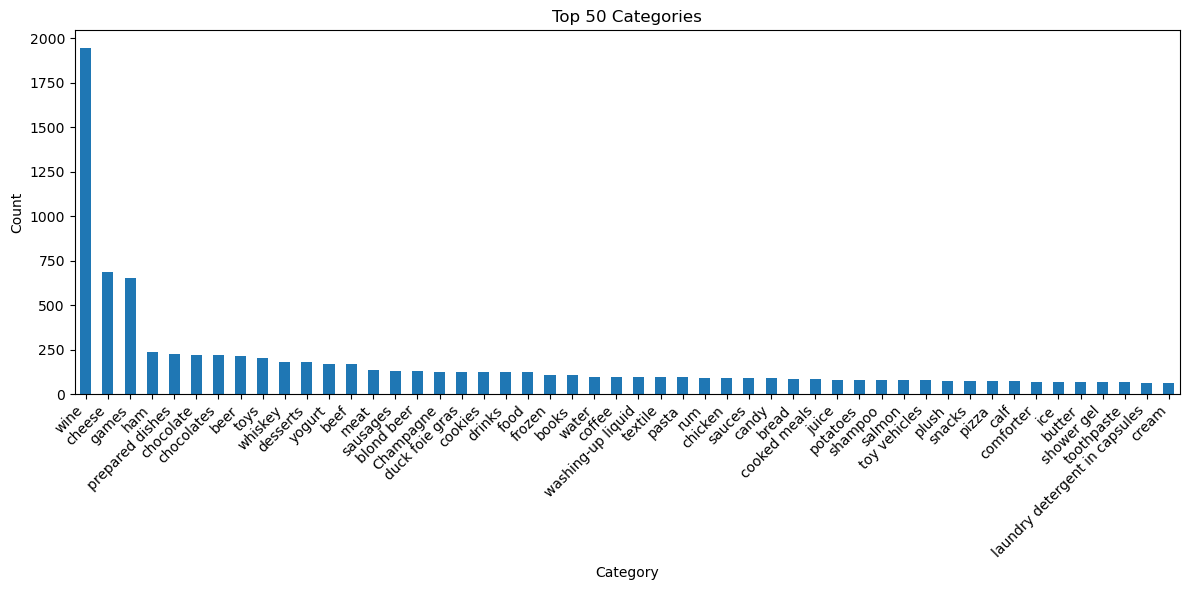

+----+--------------------------------------------------------------------------+------------+----------+---------------+-----------------+-----------------+
|    | product_name                                                             |   brand_id | locale   |   category_id | category        | product_brand   |
|----+--------------------------------------------------------------------------+------------+----------+---------------+-----------------+-----------------|
|  7 | Alsace Riesling Aop 2022                                                 |        nan | fr_fr    |          7011 | wine            | nan             |
| 10 | IGP GARD 2022                                                            |        nan | fr_fr    |          7011 | wine            | nan             |
| 12 | Couches Baby Dry                                                         |        967 | fr_fr    |          5481 | layers          | Pampers         |
| 15 | emince de legumes                            

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17262/3475600911.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)


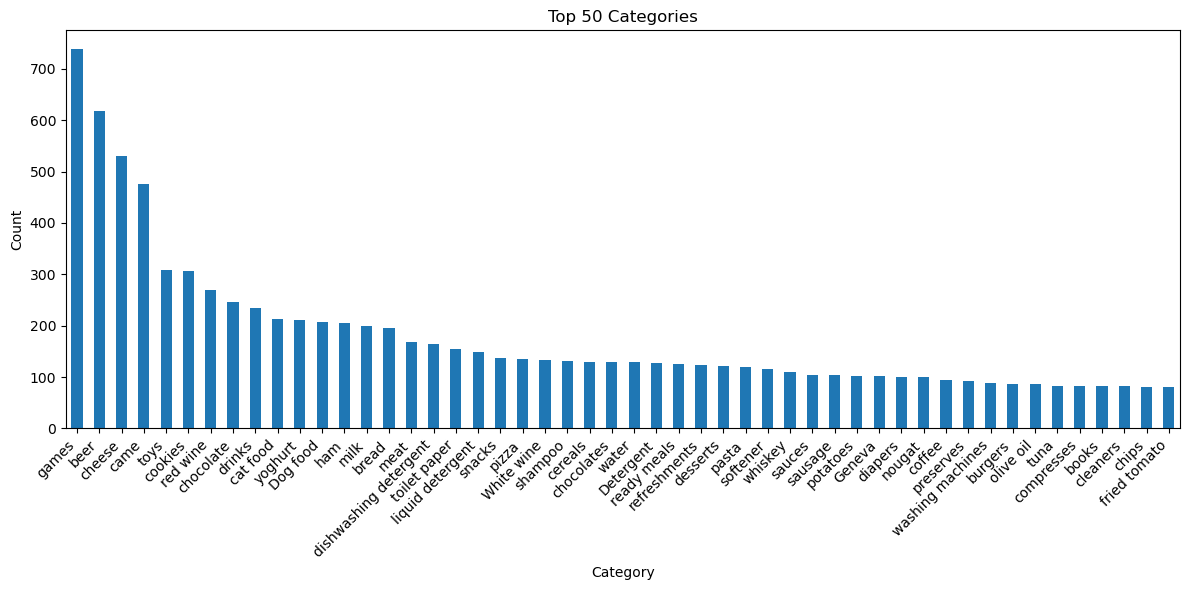

+----+-------------------------------------------------------------+------------+----------+---------------+------------+-------------------+
|    | product_name                                                |   brand_id | locale   |   category_id | category   | product_brand     |
|----+-------------------------------------------------------------+------------+----------+---------------+------------+-------------------|
|  2 | Cafe En Capsulas Espresso Descafeinado/ Extra Intenso       |        nan | es_es    |          1596 | coffee     | Dia Arom'arte     |
|  3 | Vino Tinto Utiel Requena Reserva                            |        473 | es_es    |          1312 | red wine   | Faustino Rivero   |
|  6 | Turron Original O Blanco                                    |        nan | es_es    |          1388 | nougat     | Nestle Jungly     |
|  8 | Aceitunas Con Relleno De Anchoa Sin Potenciadores Del Sabor |       2271 | es_es    |          1010 | olives     | Dia               |
| 13 |

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17262/3475600911.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)


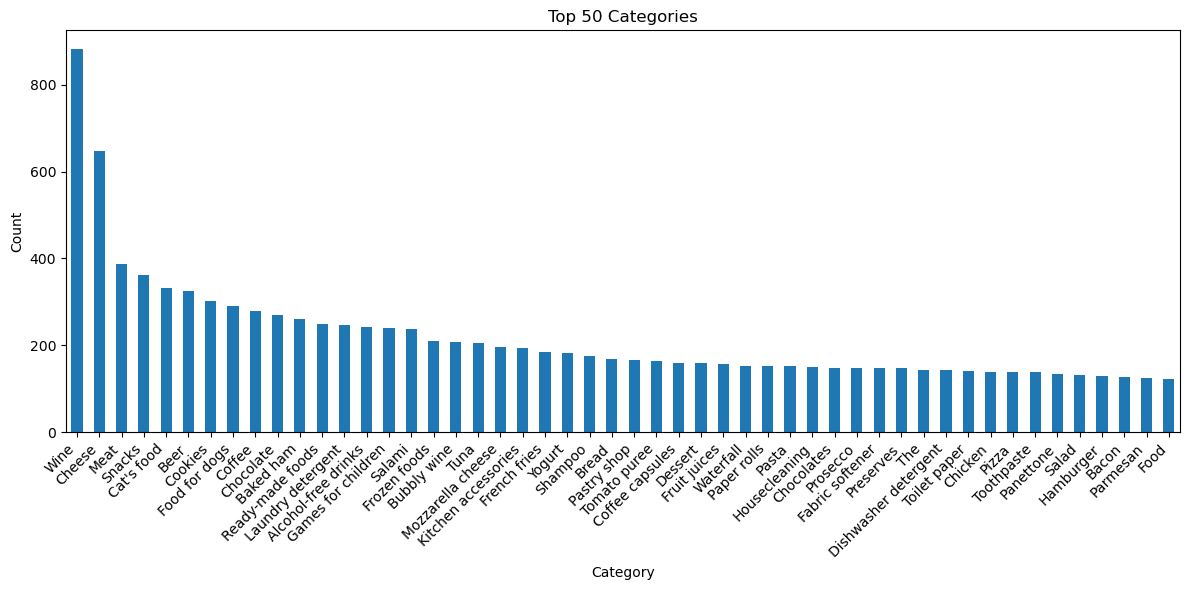

+----+-----------------------------------+------------+----------+---------------+------------------+-----------------------------+
|    | product_name                      |   brand_id | locale   |   category_id | category         | product_brand               |
|----+-----------------------------------+------------+----------+---------------+------------------+-----------------------------|
|  1 | Passata Di Pomodoro               |        nan | it_it    |         15605 | Tomato puree     | Pomi                        |
|  4 | Linea Yogurt Fatto Da Noi         |        nan | it_it    |         14719 | Yogurt           | nan                         |
|  5 | Savoiardi Classici O Buonmattino  |        nan | it_it    |         15512 | Snacks           | Pasticceria Matilde Vicenzi |
|  6 | Salmone Norvegese                 |       2334 | it_it    |         15614 | Smoked salmon    | Kv nordic                   |
|  8 | Alimento Secco Per Gatti Friskies |        nan | it_it    |         1

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17262/3475600911.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)


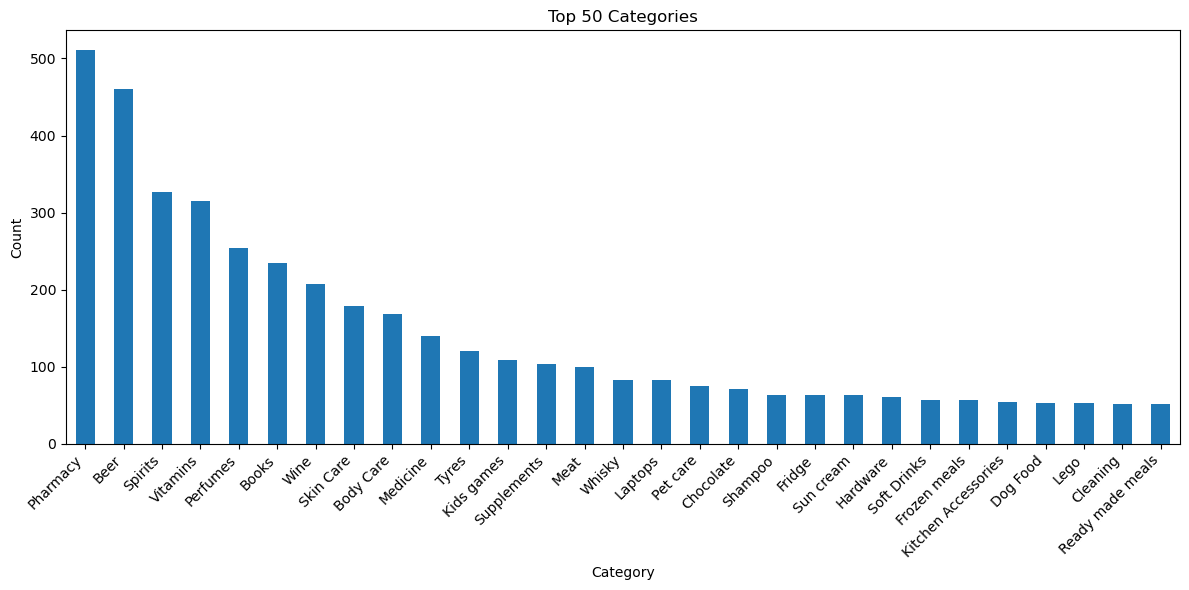

+----+-----------------------------------------------------------------------------------+------------+----------+---------------+---------------------+-----------------+
|    | product_name                                                                      |   brand_id | locale   |   category_id | category            | product_brand   |
|----+-----------------------------------------------------------------------------------+------------+----------+---------------+---------------------+-----------------|
|  0 | For Children Baby 3 Months+ Concentrated Liquid Strawberry Flavour 200mg/5ml 50ml |       1480 | en_au    |         16309 | Medicine            | Nurofen         |
|  4 | Precision Tweezers Pink                                                           |       2444 | en_au    |         14268 | Body Care           | Manicare        |
|  5 | Up Rum & Cola 4.6% Premix Range Cans 375ml                                        |       2451 | en_au    |         15609 | Spirits       

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17262/3475600911.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)


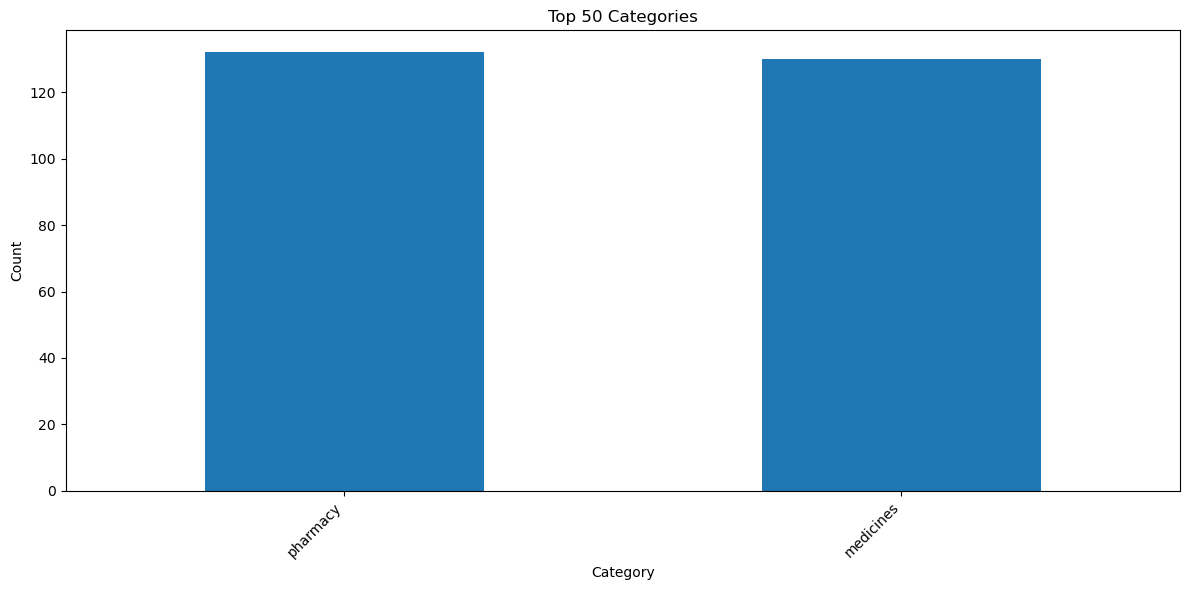

+----+------------------------------------------------------+------------+----------+---------------+------------+-----------------+
|    | product_name                                         |   brand_id | locale   |   category_id | category   | product_brand   |
|----+------------------------------------------------------+------------+----------+---------------+------------+-----------------|
| 11 | Firac 125Mg 10 Tabletas                              |        nan | es_mx    |          1572 | medicines  | Grossman        |
| 16 | Hioscina                                             |        nan | es_mx    |          1572 | medicines  | YZA             |
| 17 | Deples Jarabe 60Ml                                   |        nan | es_mx    |          5748 | pharmacy   | nan             |
| 19 | $25 por cada $100 de compra en cuidado dermatológico |       1752 | es_mx    |          5748 | pharmacy   | Eucerin         |
| 38 | 100/5mg                                              |        

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17262/3475600911.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)


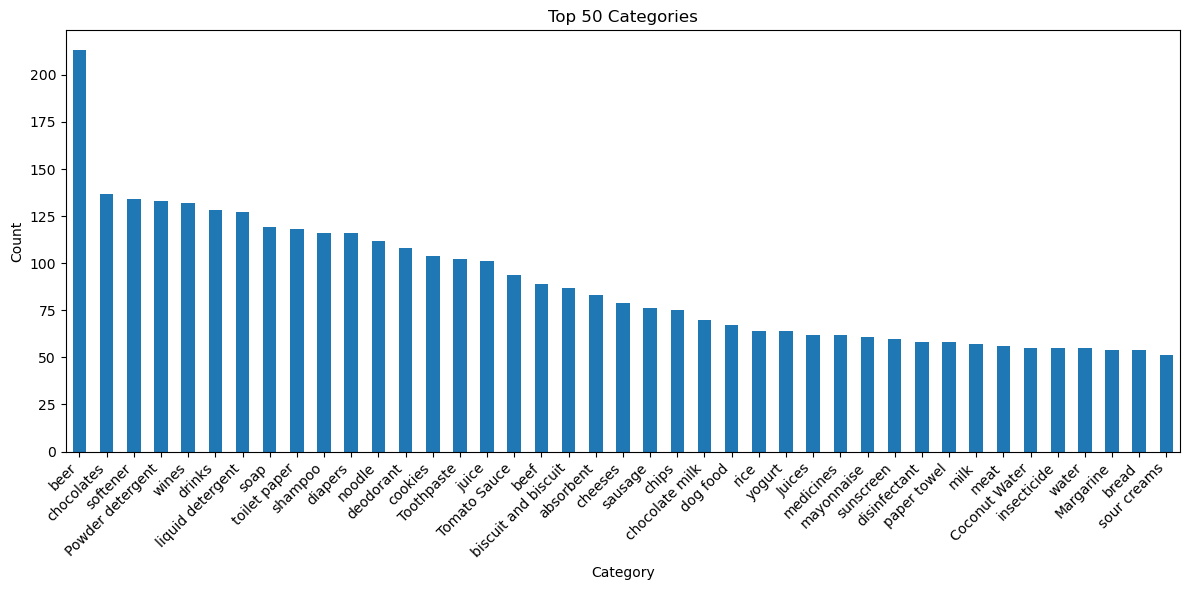

+----+---------------------------------------+------------+----------+---------------+---------------------+-----------------+
|    | product_name                          |   brand_id | locale   |   category_id | category            | product_brand   |
|----+---------------------------------------+------------+----------+---------------+---------------------+-----------------|
|  0 | Protetor Diário Leve Mais Pague Menos |       2101 | pt_br    |          1836 | absorbent           | Carefree        |
|  1 | Biscoito Choco Biscuit                |        nan | pt_br    |          6401 | biscuit and biscuit | Bauducco/Teens  |
|  2 | Toalha De Papel Luxo                  |        nan | pt_br    |          7661 | paper towel         | White Paper     |
|  4 | Cerveja Extra 330ml                   |       2595 | pt_br    |          9922 | beer                | Corona          |
|  6 | Baucart Bebida Láctea De Chocolate    |        394 | pt_br    |          4461 | chocolate milk      | Ne

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_17262/3475600911.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_df['category'] = high_quality_df['category'].map(word_dict.get)


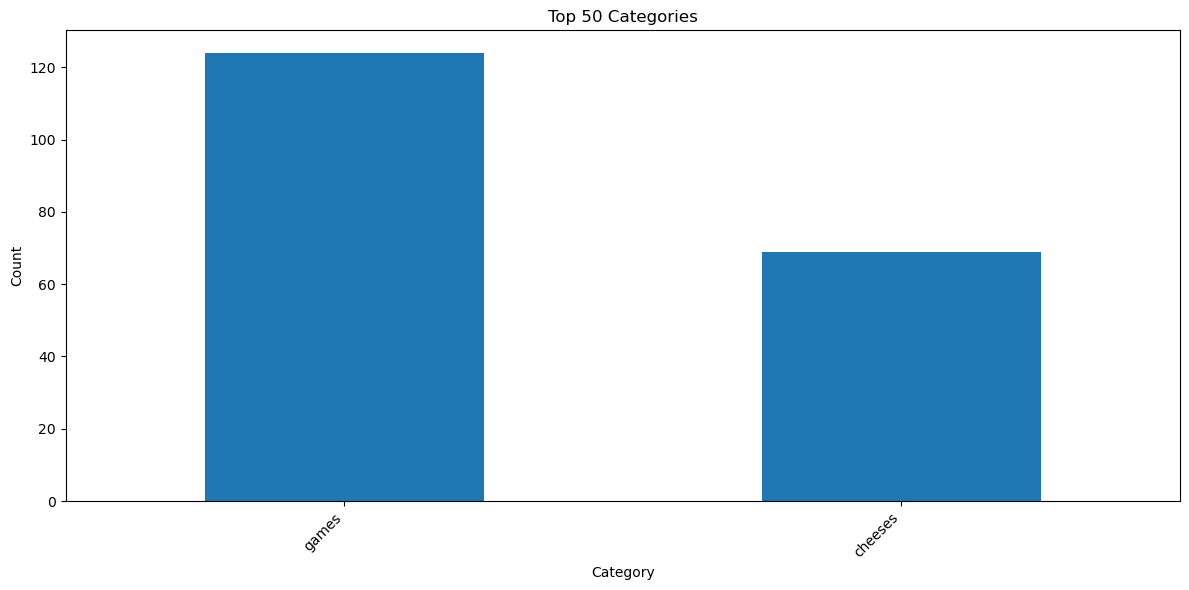

+----+--------------------------------------+------------+----------+---------------+------------+-----------------+
|    | product_name                         |   brand_id | locale   |   category_id | category   | product_brand   |
|----+--------------------------------------+------------+----------+---------------+------------+-----------------|
|  2 | SUPER TALLER DE DECORACION 3 EN 1    |        nan | pt_pt    |          7576 | games      | nan             |
| 21 | herois                               |        nan | pt_pt    |          7576 | games      | marvel          |
| 33 | Forças Especiais E Ladrão            |        380 | pt_pt    |          7576 | games      | Playmobil       |
| 56 | Unhas De Sonho Clementoni Crazy Chic |        nan | pt_pt    |          7576 | games      | nan             |
| 57 | Tabua De Queijo                      |        938 | pt_pt    |          5466 | cheeses    | santiago        |
| 59 | Queijo                               |       1361 | pt_pt

In [ ]:
# Get folder path from the user (you can modify this)
folder_path = '/Users/wenda/Documents/GITHUB/Modelling/dataset-ml_eng_task'

# Ensure the provided path is valid
if os.path.isdir(folder_path):
    df_top50 = analyze_product_data(folder_path)
else:
    print("The provided folder path is invalid. Please check the path and try again.")


Lets drop irrelevant columns

In [ ]:
print('Shape of df at beginning: ', df_top50.shape)
# removing brand_id, locale, category_id columns from df_top50 and saving to df_50
df_50 = df_top50.drop(['brand_id', 'locale', 'category_id'], axis=1)

Shape of df at beginning:  (49374, 6)


Now, lets trip the spaces at the ends and convert text to lower case.

In [ ]:

df_50 = df_50.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)
df_50.head()


,product_name,category,product_brand
0,alsace riesling aop 2022,wine,NaN
1,igp gard 2022,wine,NaN
2,couches baby dry,layers,pampers
3,emince de legumes,vegetables,boni
4,eau de source,water,cristaline


In [ ]:
df_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49374 entries, 0 to 49373
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   49374 non-null  object
 1   category       49374 non-null  object
 2   product_brand  40057 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [ ]:
print("\nNumber of NaNs in each column:")
print(df_50.isna().sum())
print('Shape of df: ', df_top50.shape)


Number of NaNs in each column:
product_name        0
category            0
product_brand    9317
dtype: int64
Shape of df:  (49374, 6)


Since product_brand has importance to us, we will drop the values that are not present. I don't find brand_id of any value so I will remove the irrelevant coliumns along with brand_id.

In [ ]:
df_50.dropna(inplace= True)
print(df_50.isna().sum())
print('\nShape of df after removing nans: ', df_50.shape)

product_name     0
category         0
product_brand    0
dtype: int64

Shape of df after removing nans:  (40057, 3)


In [ ]:
# Check for duplicates
duplicates = df_50.duplicated()
duplicate_count = duplicates.sum()
print("\nCount of duplicate rows:", duplicate_count)

# Drop duplicates
df = df_50.drop_duplicates()

# Print the size after dropping duplicates
print("\nSize of DataFrame after dropping duplicates:", df.shape)

# Print the DataFrame after dropping duplicates
print("\nDataFrame after dropping duplicates:\n", df)


Count of duplicate rows: 5577

Size of DataFrame after dropping duplicates: (34480, 3)

DataFrame after dropping duplicates:
                               product_name    category    product_brand
2                         couches baby dry      layers          pampers
3                        emince de legumes  vegetables             boni
4                            eau de source       water       cristaline
5      sur la gamme des découpes de poulet     chicken  fermier de loué
6                   boîte création dessert  chocolates            lindt
...                                    ...         ...              ...
49367                          queijo nisa     cheeses           auchan
49369                       queijo de vaca     cheeses          limiano
49370                      queijo flamengo     cheeses        campainha
49371                     bonecas voadoras       games      sky dancers
49373               a heran�a da tia �gata       games           majora

[34480 r

Now lets epxlore the categories of combined df: df_50

Number of unique categories: 278

Counts of each category:
 wine                     2102
cheese                   1302
beer                     1034
games                     711
cookies                   695
                         ... 
floors                     12
plants                      6
hardware                    6
plant                       5
christmas decorations       4
Name: category, Length: 278, dtype: int64


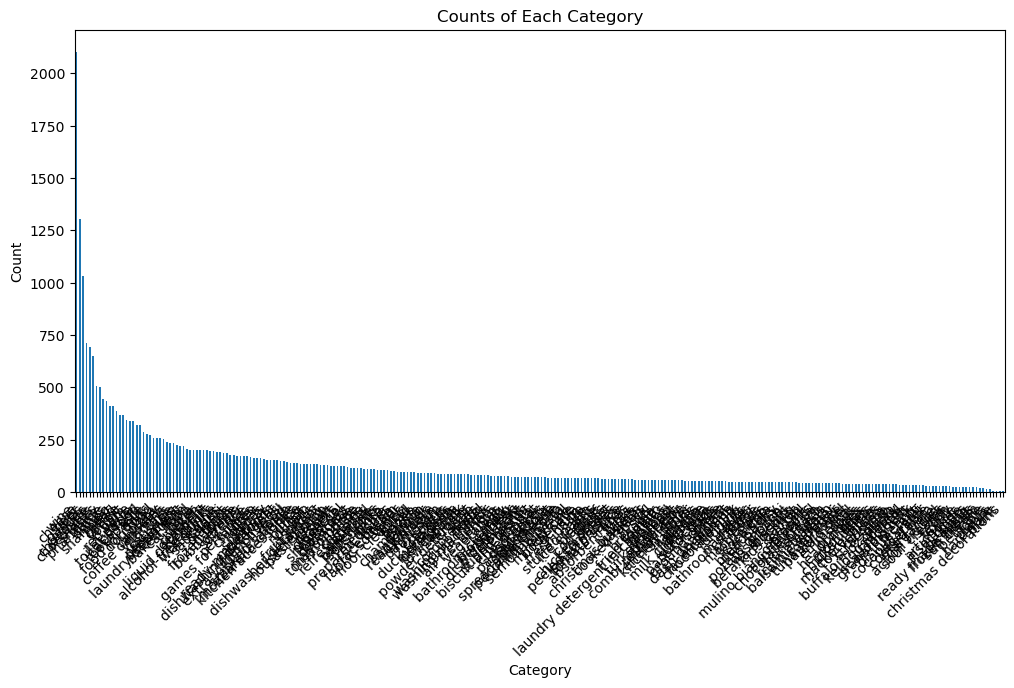

In [ ]:
# Count unique categories
unique_categories = df['category'].nunique()
print("Number of unique categories:", unique_categories)

# Count of each category
category_counts = df['category'].value_counts()
print("\nCounts of each category:\n", category_counts)

# Plot the counts of each category
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Counts of Each Category")
plt.xticks(rotation=45, ha="right")  # Rotate x-labels for readability
plt.show()

In [ ]:
# Count of each category
category_counts = df['category'].value_counts()
print("\nCounts of each category:\n", category_counts)



Counts of each category:
 wine                     2102
cheese                   1302
beer                     1034
games                     711
cookies                   695
                         ... 
floors                     12
plants                      6
hardware                    6
plant                       5
christmas decorations       4
Name: category, Length: 278, dtype: int64


Checking counts that are less than 50

In [ ]:
# Filter out categories with counts less than 50
filtered_categories = category_counts[category_counts >= 50]

# Count the remaining unique categories
remaining_categories = filtered_categories.index
num_remaining_categories = len(remaining_categories)

# Output
print("Number of categories with counts >= 50:", num_remaining_categories)
print("Remaining categories:", remaining_categories)

Number of categories with counts >= 50: 199
Remaining categories: Index(['wine', 'cheese', 'beer', 'games', 'cookies', 'chocolate', 'chocolates',
       'snacks', 'pharmacy', 'came',
       ...
       'milk chocolate', 'light tuna', 'sunscreen', 'pate for dogs', 'salads',
       'ground coffee', 'juices', 'dash detergent', 'anchovies',
       'face cleaning'],
      dtype='object', length=199)


In [ ]:
# Filter the DataFrame based on the remaining categories
df_filtered = df[df['category'].isin(remaining_categories)]

# Output
print("Length of DataFrame after filtering:", len(df_filtered))

Length of DataFrame after filtering: 31682


In [ ]:
df_filtered.to_csv("filtred_199cat.csv")

Lets use Levenshtein distance to find relation between categories that might be too similar

In [ ]:
def find_close_matches(df, column, threshold=2):
    """Find close matches in a given column based on Levenshtein distance."""
    unique_texts = df[column].unique()
    close_matches = []

    for i in range(len(unique_texts)):
        for j in range(i + 1, len(unique_texts)):
            if lev.distance(unique_texts[i], unique_texts[j]) <= threshold:
                close_matches.append((unique_texts[i], unique_texts[j]))

    return close_matches


# Find close matches in the 'product_name' column with a threshold of 1
close_matches = find_close_matches(df, 'category', threshold=1)

print("Close matches based on Levenshtein distance:")
for match in close_matches:
    print(match)


Close matches based on Levenshtein distance:
('vegetables', 'vegetable')
('chocolates', 'chocolate')
('desserts', 'dessert')
('wine', 'wines')
('ham', 'jam')
('cheese', 'cheeses')
('butter', 'bitter')
('sausages', 'sausage')
('juice', 'juices')
('yogurt', 'yoghurt')
('whiskey', 'whisky')
('ice', 'rice')
('sauces', 'sauce')
('beer', 'beef')
('plants', 'plant')
('salads', 'salad')
('detergent', 'detergents')
('wipes', 'wines')
('dash detergent', 'dish detergent')
('absorbents', 'absorbent')
('medicine', 'medicines')


In [ ]:
df.columns

Index(['product_name', 'category', 'product_brand'], dtype='object')

Lets create list of sentences after combining 'product_name', 'category', 'product_brand'. On this data, we will train word2vec model.

In [ ]:
product_name', 'category', 'product_brand'

In [ ]:
cosine_similarity_score("plants", "plants")

1.0